In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [2]:
SCK2 = pd.read_csv('May5_COtest_SCK2.csv')
SCK3 = pd.read_csv('May5_COtest_SCK3.csv')

In [3]:
print SCK2.shape
print SCK3.shape

(591, 9)
(1166, 9)


In [4]:
# start and end of all in the same format with adjusted dates and times
def status(array):
    print 'Start =',min(array),'  End =',max(array),'  Length =', len(array)

In [5]:
# finding matching starting time indecies
status(SCK2[' UTC'][18:])
status(SCK3[' UTC'][:])

Start = 2016-05-00 11:40:55   End = 2016-05-00 14:01:13   Length = 573
Start = 2016-05-00 11:45:49   End = 2016-05-00 14:06:05   Length = 1166


In [6]:
SCK2 = SCK2[18:]
SCK3 = SCK3[:]

In [7]:
# Fixing the SCK times
# string manipulation - replacing all the day 00's with 05's in SCK time

# the SCK time doesn't have any garbage
sck2_time = pd.to_datetime(SCK2[' UTC'])
sck3_time = pd.to_datetime(SCK3[' UTC'])

# making numpy arrays
stime2 = np.array(sck2_time)
stime3 = np.array(sck3_time)

new2 = []
for i in range(len(stime2)):
    w = list(stime2[i])
    w[9] = '2'
    new2 = np.append(''.join(w),new2)
shms2 = new2[::-1] # needs to be flipped

new3 = []
for i in range(len(stime3)):
    w = list(stime3[i])
    w[9] = '2'
    new3 = np.append(''.join(w),new3)
shms3 = new3[::-1] # needs to be flipped

In [8]:
SCK2time = shms2
SCK2x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in SCK2time] # not used in plotting, time adj needed
SCK3time = shms3
SCK3x = [datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S") for s in SCK3time] # not used in plotting, time adj needed

In [9]:
# Time adjust to make them match almost exactly on the second to the computer

SCK2new = []
for i in range(0,len(SCK2time)):
    ddt = datetime.datetime.strptime(SCK2time[i],"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-19)
    SCK2new = np.append(adj,SCK2new)
SCK2new = SCK2new[::-1]

SCK3new = []
for i in range(0,len(SCK3time)):
    ddt = datetime.datetime.strptime(SCK3time[i],"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-14)
    SCK3new = np.append(adj,SCK3new)
SCK3new = SCK3new[::-1]

In [16]:
xfmt = mdates.DateFormatter('%H:%M')

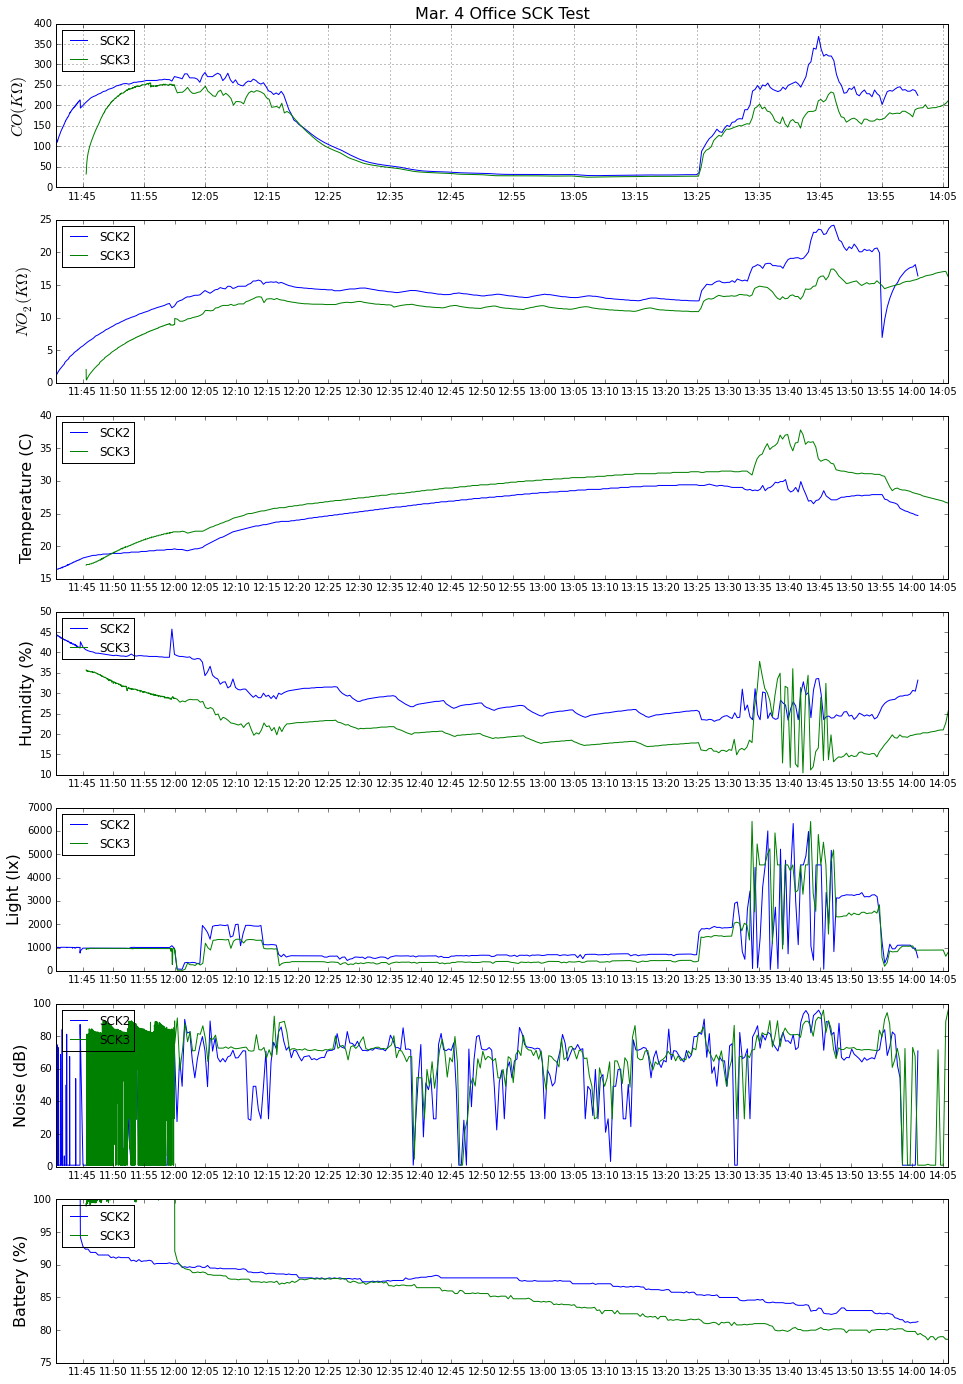

In [128]:
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(711)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax1.plot(SCK2new,SCK2[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3new,SCK3[' Carbon Monxide ( kOhm) '],label='SCK3')
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax1.set_title('Mar. 4 Office SCK Test', fontsize=16)
ax1.legend(loc='upper left')
ax1.grid()

ax2 = fig.add_subplot(712)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax2.plot(SCK2new,SCK2[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3new,SCK3[' Nitrogen Dioxide ( kOhm) '],label='SCK3') 
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(713)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax3.plot(SCK2new,SCK2['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3new,SCK3['Temperature ( C) '],label='SCK3') 
ax3.set_ylabel('Temperature (C)', fontsize=16)
ax3.legend(loc='upper left')

ax4 = fig.add_subplot(714)
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax4.plot(SCK2new,SCK2[' Humidity ( %) '],label='SCK2')
ax4.plot(SCK3new,SCK3[' Humidity ( %) '],label='SCK3') 
ax4.set_ylabel('Humidity (%)', fontsize=16)
ax4.legend(loc='upper left')

ax5 = fig.add_subplot(715)
ax5.xaxis.set_major_formatter(xfmt)
ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax5.plot(SCK2new,SCK2[' Light ( lx) '],label='SCK2')
ax5.plot(SCK3new,SCK3[' Light ( lx) '],label='SCK3') 
ax5.set_ylabel('Light (lx)', fontsize=16)
ax5.legend(loc='upper left')

ax6 = fig.add_subplot(716)
ax6.xaxis.set_major_formatter(xfmt)
ax6.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax6.plot(SCK2new,SCK2[' Noise ( dB) '],label='SCK2')
ax6.plot(SCK3new,SCK3[' Noise ( dB) '],label='SCK3') 
ax6.set_ylabel('Noise (dB)', fontsize=16)
ax6.legend(loc='upper left')

ax7 = fig.add_subplot(717)
ax7.xaxis.set_major_formatter(xfmt)
ax7.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax7.plot(SCK2new,SCK2[' Battery ( %) '],label='SCK2')
ax7.plot(SCK3new,SCK3[' Battery ( %) '],label='SCK3') 
ax7.set_ylabel('Battery (%)', fontsize=16)
ax7.legend(loc='upper left')

#plt.savefig('SCK_Mar4test.eps', format='eps', dpi=1200)

In [79]:
status(SCK2new[268:511])
status(SCK3new[587:1092])

Start = 2016-05-02 11:55:24   End = 2016-05-02 13:35:14   Length = 243
Start = 2016-05-02 11:55:25   End = 2016-05-02 13:35:09   Length = 505


In [119]:
status(SCK2new[507:542])
status(SCK3new[1088:1123])

Start = 2016-05-02 13:34:00   End = 2016-05-02 13:48:04   Length = 35
Start = 2016-05-02 13:33:55   End = 2016-05-02 13:48:01   Length = 35


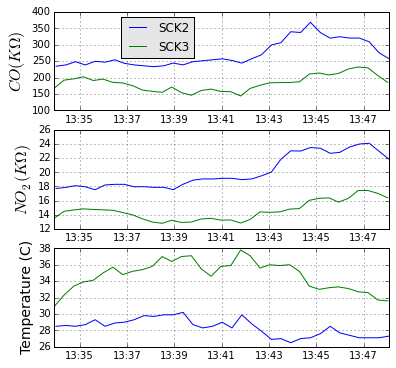

In [142]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(311)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax1.plot(SCK2new[507:542],SCK2[' Carbon Monxide ( kOhm) '][507:542],label='SCK2')
ax1.plot(SCK3new[1088:1123],SCK3[' Carbon Monxide ( kOhm) '][1088:1123],label='SCK3')
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
#ax1.set_title('May 5 CO SCK Test', fontsize=16)
legend = ax1.legend(loc=[0.20,0.53],fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax1.grid()

ax2 = fig.add_subplot(312)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax2.plot(SCK2new[507:542],SCK2[' Nitrogen Dioxide ( kOhm) '][507:542],label='SCK2')
ax2.plot(SCK3new[1088:1123],SCK3[' Nitrogen Dioxide ( kOhm) '][1088:1123],label='SCK3') 
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.grid()

ax3 = fig.add_subplot(313)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=2))
ax3.plot(SCK2new[507:542],SCK2['Temperature ( C) '][507:542],label='SCK2')
ax3.plot(SCK3new[1088:1123],SCK3['Temperature ( C) '][1088:1123],label='SCK3') 
ax3.set_ylabel('Temperature (C)', fontsize=14)
ax3.grid()

plt.savefig('WalkBike.png', format='png', dpi=300)

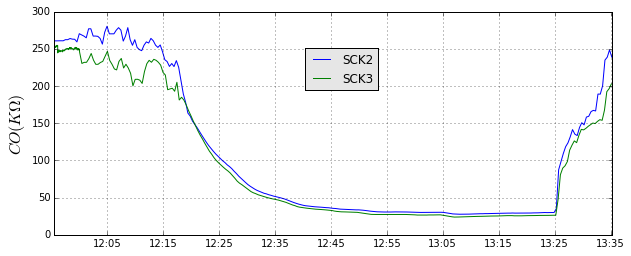

In [82]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax1.plot(SCK2new[268:511],SCK2[' Carbon Monxide ( kOhm) '][268:511],label='SCK2')
ax1.plot(SCK3new[587:1092],SCK3[' Carbon Monxide ( kOhm) '][587:1092],label='SCK3')
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
#ax1.set_title('May 5 CO SCK Test', fontsize=16)
legend = ax1.legend(loc=[0.45,0.65],fontsize=12)
frame = legend.get_frame()
frame.set_facecolor('0.90')
ax1.grid()

#plt.savefig('May5CO.png', format='png', dpi=300)